# Graphical Excellence

Matplotlib is a great tool for static viz, and there are a handful of rules I tend to follow to maximize the final value of the graphic.  We'll go over these here. 

## Required Preparation

 - Go over the [Lecture 3](https://robertsj.github.io/me400_notes/lectures/Basic_Data_Processing_with_NumPy_and_Matplotlib.html) and [Lecture 4](https://robertsj.github.io/me400_notes/lectures/More_on_NumPy_Arrays.html) notes from ME 400 on Matplotlib (and NumPy)
 - Skim the examples at the [Matplotlib Gallery](https://matplotlib.org/3.1.1/gallery/index.html)
 - Read this short [article](https://storybydata.medium.com/edward-tufte-data-visualization-pioneer-e70eb3a8e2f0) about Edward Tufte
 - Learn about [colormaps](https://bids.github.io/colormap/) 
 
 
I have to point out this Coursera course: [Applied Plotting, Charting & Data Representation in Python](https://www.coursera.org/learn/python-plotting).  It's basically the course I'm trying to distill into a single module!  Two good videos for *this* lecture are these:
  
  - [Data-Ink Ratio](https://www.coursera.org/lecture/python-plotting/graphical-heuristics-data-ink-ratio-edward-tufte-qFnP9)
  - [Chart Junk](https://www.coursera.org/lecture/python-plotting/graphical-heuristics-chart-junk-edward-tufte-LCcy7)
  
They are super short, so watch them!
  

# Excellence in Graphics 

Tufte's *The Visual Display of Quantitative Information* is an authoritative collection of examples (good and bad) of and rules-of-thumb for graphical displays.  Two broad rules emerge from that text:

  - Do display the data (and "reveal" its story) using as little ink and space as possible
  - Do not distort the data (fairly or unfairly) by adding features that do not exist
  

## A Case Study - The Classical Spreadsheet Bar Chart

Consider this maybe-not-so-familiar-anymore plot:

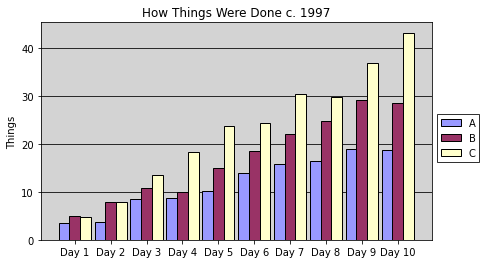

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
np.random.seed(1234)
x = np.arange(1, 11)
a = 1 + 2*x + np.random.normal(0, 1, size=10)
b = 0.5 + 3*x + np.random.normal(0, 1.3, size=10)
c = 1.2 + 4*x + np.random.normal(0, 1.9, size=10)
labels = ['Day {}'.format(i) for i in range(1, 11)]
width = 0.3 # the width of the bars
fig, ax = plt.subplots(figsize=(7,4))
ax.grid(which='major', axis="y", zorder=0, color='k')
ax.set_facecolor('lightgray')
rects_a = ax.bar(x - width, a, width, zorder=3, label='A', color=(153/255,153/255,255/255, 1),  edgecolor="k")
rects_b = ax.bar(x,         b, width, zorder=3, label='B', color=(153/255, 51/255, 102/255, 1), edgecolor="k")
rects_c = ax.bar(x + width, c, width, zorder=3, label='C', color=(1,1,204/255, 1), edgecolor="k")
ax.set_ylabel('Things')
ax.set_title('How Things Were Done c. 1997')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1.0, 0.4, 0, .2), loc=0, edgecolor='k', fancybox=False);

I give you the code to give you the first instance of how to modify plot formats.  It's also a reminder that just two decades ago, the default image bled those inkjet printers dry.

Can we improve anything? 

 - Are bars the right way to show the data?  If data-to-ink is to be maximized, and you have no special reason to use bars, then...no.
 
 - Gray is not free.
 
 - Day is redundant.
 
 If the independent variable (day) is not continuous, then a scatter plot may be best.  Legends are good, but we can annotate the curve (or points).  When ink is expensive, use markers that don't need ink!  Finally, axes can be removed if the values shown are annotated.  
 
Here's a reasonably low-ink example:

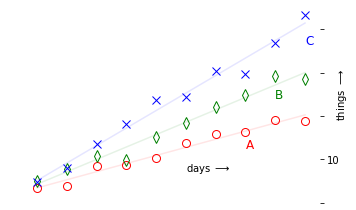

In [2]:
f = plt.figure(figsize=(5,3))
ax = f.add_subplot(111, frameon=False)
ax.plot(x, a, 'o', mec='r', mfc=(1, 1, 1, 0.0), ms=8);
ax.plot(x, b, 'd', mec='g', mfc=(1, 1, 1, 0.0), ms=8)
ax.plot(x, c, 'x', mec='b', mfc=(1, 1, 1, 0.0), ms=8)
ax.plot(x, np.polyval(np.polyfit(x, a, 1), x), 'r', alpha=0.1)
ax.plot(x, np.polyval(np.polyfit(x, b, 1), x), 'g', alpha=0.1)
ax.plot(x, np.polyval(np.polyfit(x, c, 1), x), 'b', alpha=0.1)
ax.set_xticks([])
ax.set_yticks([0, 10, 20, 30, 40])
ax.set_yticklabels( ['', '10', '', '', ''])
ax.set_xlim((0, 10.5))
ax.text(x=x[7], y=a[7]*.9, s="A", ha='left', va='top',
        fontsize=12, color='r')

ax.text(x=x[8], y=b[8]*.9, s="B", ha='left', va='top',
        fontsize=12, color='g')

ax.text(x=x[9], y=c[9]*0.9, s="C", ha='left', va='top',
        fontsize=12, color='b')

ax.text(x=6, y=8, s="days $\\longrightarrow$", ha='left', va='center',
        fontsize=10, color='k')


ax.text(x=11., y=25, s="things $\\longrightarrow$", ha='left', va='center',
        fontsize=10, color='k', rotation=90)

ax.yaxis.tick_right()
ax.yaxis.set_tick_params(colors='k')
plt.tight_layout(True)

## Defaulting to Good Graphics

In [3]:
def init_nice_plots() :
    from matplotlib import rcParams
    rcParams['font.family'] = 'serif'
    rcParams['font.serif'] = ['Times']
    rcParams['xtick.direction'] = 'out'
    rcParams['ytick.direction'] = 'out'
    rcParams['xtick.labelsize'] = 12
    rcParams['ytick.labelsize'] = 12
    rcParams['ytick.left'] = True
    rcParams['ytick.right'] = True
    rcParams['ytick.left'] = True
    rcParams['ytick.right'] = True        
    rcParams['lines.linewidth'] = 1
    rcParams['axes.labelsize']  = 12
    rcParams['legend.fontsize'] = 12
    rcParams['legend.fancybox'] = False
    rcParams['legend.framealpha'] = 0.0
    rcParams['figure.autolayout'] = True 
    rcParams['figure.frameon']  = False
    rcParams['figure.edgecolor'] = 'w'

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


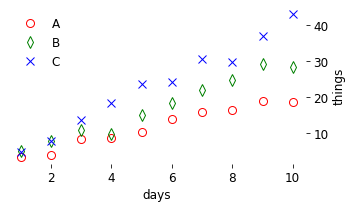

In [4]:
init_nice_plots()
f = plt.figure(figsize=(5,3))
ax = f.gca(frameon=False) # not sure why this fails from rc
ax.plot(x, a, 'o', mec='r', mfc=(1, 1, 1, 0.0), ms=8);
ax.plot(x, b, 'd', mec='g', mfc=(1, 1, 1, 0.0), ms=8)
ax.plot(x, c, 'x', mec='b', mfc=(1, 1, 1, 0.0), ms=8)
ax.set_xlabel('days')
ax.set_ylabel('things')
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_tick_params()
ax.legend(['A', 'B', 'C'])
plt.tight_layout(True)

## A Case Study - Bad Colors

Consider this wild data:

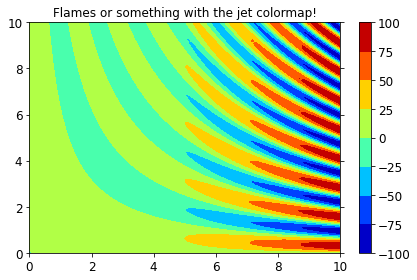

In [17]:
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
xx, yy = np.meshgrid(x, y)
zz = xx**2*np.sin(yy*xx/2)
plt.figure(1)
plt.contourf(xx, yy, zz, cmap='jet')
plt.colorbar()
plt.title("Flames or something with the jet colormap!")
plt.savefig('flames_jet.png')

Let's "print" it on my black and white printer:

In [12]:
from PIL import Image 
image_file = Image.open("flames_jet.png") # open colour image
image_file = image_file.convert('LA') # convert image to black and white
image_file.save('flames_jet_bw.png')

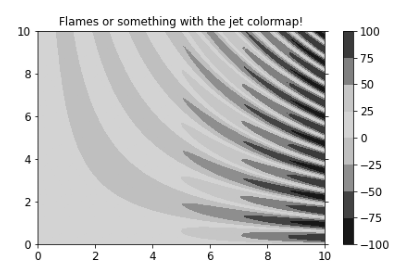

In [19]:
import matplotlib.image as mpimg
img = mpimg.imread('flames_jet_bw.png')
plt.figure(2)
plt.axis('off')
plt.imshow(img);

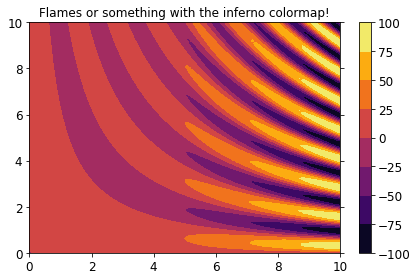

In [20]:
plt.figure(3)
plt.contourf(xx, yy, zz, cmap='inferno')
plt.colorbar()
plt.title("Flames or something with the inferno colormap!")
plt.savefig('flames_inferno.png')

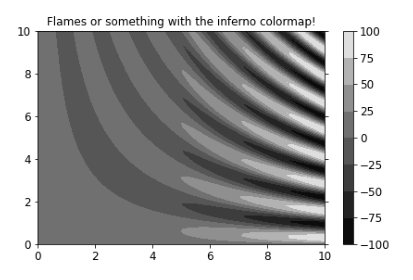

In [21]:
from PIL import Image 
image_file = Image.open("flames_inferno.png") # open colour image
image_file = image_file.convert('LA') # convert image to black and white
image_file.save('flames_inferno_bw.png')
img = mpimg.imread('flames_inferno_bw.png')
plt.figure(4)
plt.axis('off')
plt.imshow(img);